# Clasificación, Clasterización y Series Temporales


## 1. Preparación de datos

In [2]:
import pandas as pd

df_estadisticas = pd.read_csv('datos_limpios/estadisticas_champions.csv')

df_estadisticas.head()


,HOME_TEAM,Goles a favor,Goles en contra,Partidos jugados,Victorias,Empates,Derrotas,Porcentaje Victoria,Porcentaje Empate,Porcentaje Derrota
0,Bayern München,192,65,71,52,9,6,73.239437,12.676056,8.450704
1,Manchester City,175,75,75,48,14,8,64.000000,18.666667,10.666667
2,Real Madrid,174,97,79,49,12,11,62.025316,15.189873,13.924051
3,Liverpool FC,144,72,65,40,9,11,61.538462,13.846154,16.923077
4,Juventus,102,65,63,37,9,9,58.730159,14.285714,14.285714


## 2. Aplicación Técnicas de Clustering

Voy a empezar utilizando K-Means que me dará una primera visión de cómo se agrupan los equipos basándome en las estadísticas. Utilizaré el mñetodo del codo para determinar número óptimo de clusters.



In [4]:
from sklearn.preprocessing import StandardScaler

#Selecciono las columnas númericas(todas)
columnas_numericas = ['Goles a favor', 'Goles en contra', 'Partidos jugados', 
                      'Victorias', 'Empates', 'Derrotas', 
                      'Porcentaje Victoria', 'Porcentaje Empate', 'Porcentaje Derrota']

#Instancio el escalador
scaler = StandardScaler()

#Normalizo columnas numéricas
df_estadisticas_normalizadas = df_estadisticas.copy()
df_estadisticas_normalizadas[columnas_numericas] = scaler.fit_transform(df_estadisticas[columnas_numericas])

df_estadisticas_normalizadas.head()

C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

,HOME_TEAM,Goles a favor,Goles en contra,Partidos jugados,Victorias,Empates,Derrotas,Porcentaje Victoria,Porcentaje Empate,Porcentaje Derrota
0,Bayern München,3.628676,1.398950,2.458466,3.442071,1.039859,0.322696,2.441608,-0.774507,-1.602912
1,Manchester City,3.238281,1.850038,2.660319,3.123588,2.261379,0.951953,1.963092,-0.297731,-1.427353
2,Real Madrid,3.215316,2.842431,2.862172,3.203208,1.772771,1.895840,1.860822,-0.574439,-1.169288
3,Liverpool FC,2.526383,1.714712,2.155687,2.486621,1.039859,1.895840,1.835608,-0.681382,-0.931692
4,Juventus,1.561876,1.398950,2.054760,2.247758,1.039859,1.266582,1.690164,-0.646399,-1.140635


C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

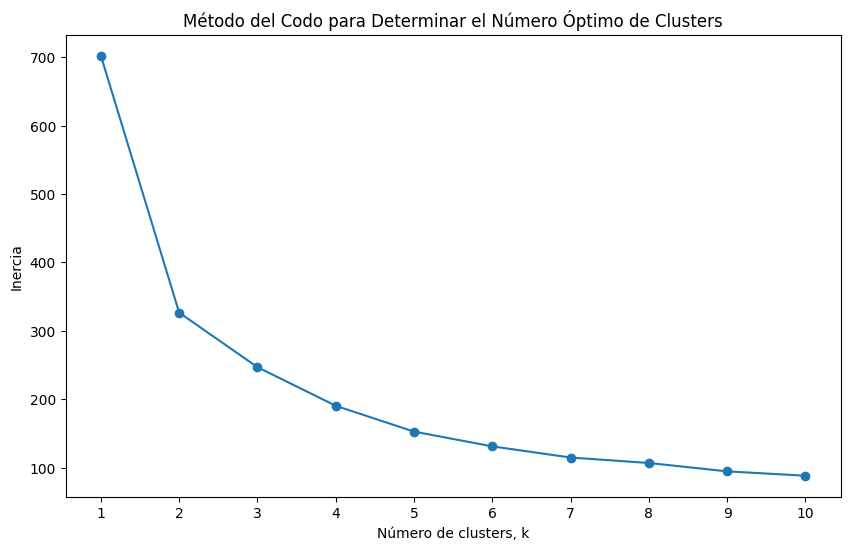

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Determino el rango de valores de k a probar
k_valores = range(1, 11)

#Calculo la inercia para cada valor de k
inercias = []
for k in k_valores:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_estadisticas_normalizadas[columnas_numericas])
    inercias.append(kmeans.inertia_)

#Grafico la inercia para cada valor de k para identificar el codo
plt.figure(figsize=(10, 6))
plt.plot(k_valores, inercias, '-o')
plt.xlabel('Número de clusters, k')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xticks(k_valores)
plt.show()


Este método nos dice que hay que buscar el punto donde la reducción de la inercia comienza a ser mas lenta (3 o 4 en este caso), lo que indica que añadir más clusters no mejora significativamente la compactación de los clusters.

Decido elegir k=4

### Aplicación K-Means con k = 4

Voy a distribuir los equipos en 4 clusteres

C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

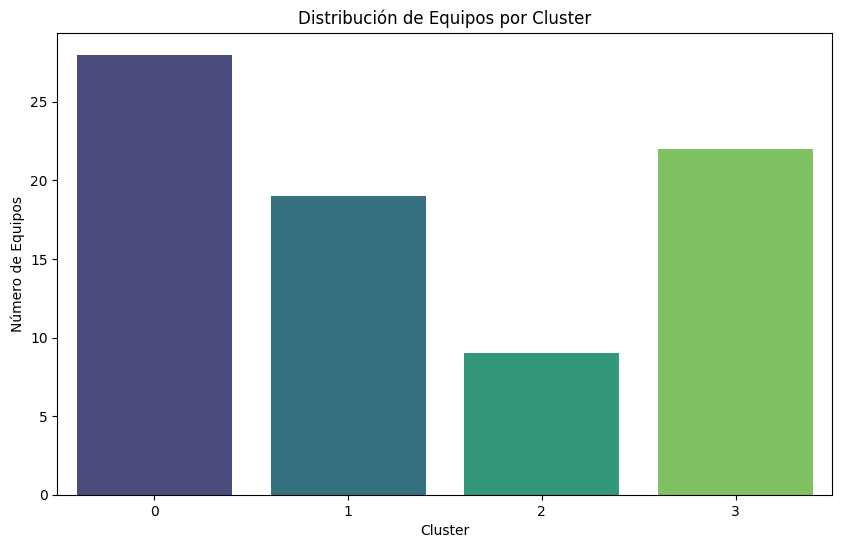

In [8]:
import seaborn as sns

#Aplicación
kmeans = KMeans(n_clusters=4, random_state=42)
df_estadisticas_normalizadas['cluster'] = kmeans.fit_predict(df_estadisticas_normalizadas[columnas_numericas])

#Visualización
plt.figure(figsize=(10, 6))
sns.countplot(data=df_estadisticas_normalizadas, x='cluster', palette='viridis')
plt.title('Distribución de Equipos por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Equipos')
plt.show()

In [9]:
#Listo los equipos por cluster
for cluster in range(4):
    print(f"\nEquipos en el cluster {cluster}:")
    equipos = df_estadisticas_normalizadas[df_estadisticas_normalizadas['cluster'] == cluster]['HOME_TEAM'].tolist()
    print(", ".join(equipos))


Equipos en el cluster 0:
Leicester City, Arsenal FC, Villarreal CF, FC Schalke 04, Eintracht Frankfurt, Valencia CF, FC Basel, Viktoria Plze?, AC Milan, FC Sheriff, CSKA Moskva, Lazio Roma, Bayer Leverkusen, Bor. Mönchengladbach, Spartak Moskva, FC København, VfL Wolfsburg, FK Krasnodar, FK Rostov, Celtic FC, Slavia Praha, 1899 Hoffenheim, Qaraba? FK, PSV Eindhoven, PFC Ludogorets Razgrad, NK Maribor, FC Midtjylland, APOEL Nikosia

Equipos en el cluster 1:
Chelsea FC, AFC Ajax, AS Roma, RB Leipzig, Manchester United, FC Porto, SSC Napoli, Tottenham Hotspur, Inter, SL Benfica, Atalanta, Sevilla FC, Sporting CP, Olympique Lyon, RB Salzburg, Shakhtar Donetsk, Be?ikta?, AS Monaco, Club Brugge KV

Equipos en el cluster 2:
Bayern München, Manchester City, Real Madrid, Liverpool FC, Juventus, FC Barcelona, Paris Saint-Germain, Borussia Dortmund, Atlético Madrid

Equipos en el cluster 3:
Olympique Marseille, Lille OSC, RSC Anderlecht, Zenit St. Petersburg, Maccabi Haifa, Feyenoord, BSC Young 

## DBSCAN
